In [1]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

#!conda install -c conda-forge geopy --yes 


Hello Capstone Project Course!


In [2]:
#!pip install folium==0.5.0

In [3]:
import requests
from bs4 import BeautifulSoup

wiki_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(wiki_url,'lxml')

In [4]:
canada_xml = soup.find('table',{'class':'wikitable sortable'})
canada_xml

t_rows = canada_xml.find_all('tr')
t_rows

pdata = [['Postcode', 'Borough', 'Neighbourhood\n']]

for tr in t_rows:
    th = tr.find_all('td')
    row = [i.text for i in th] 
    rowl = [row]
    pdata = pdata + rowl
    

df = pd.DataFrame(pdata) 

df[2].replace(regex=['\n'], value='',inplace=True)

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header

df.head()

,Postcode,Borough,Neighbourhood
1,None,None,None
2,M1A,Not assigned,Not assigned
3,M2A,Not assigned,Not assigned
4,M3A,North York,Parkwoods
5,M4A,North York,Victoria Village


In [5]:
dfna = df[df.Borough != 'Not assigned']
dfna.shape

(211, 3)

In [6]:
dfna['Neighbourhood'].value_counts().sort_values(ascending=False).head()

St. James Town    2
Runnymede         2
Cliffcrest        1
Union Station     1
Mount Olive       1
Name: Neighbourhood, dtype: int64

In [7]:
#Formatting the table to achieve dataframe based on the requirement

re = dfna.groupby(['Postcode'])
re
newlist = []

for name,group in re:
    #print(name)
    
    gr_post = group['Postcode'].tolist()
    gr_post = list(dict.fromkeys(gr_post))

    
    gr_Borough = group['Borough'].tolist()
    gr_Borough = list(dict.fromkeys(gr_Borough))
    
    gr_neigh = group['Neighbourhood'].tolist()
    
    newlist = newlist + [[ gr_post, gr_Borough, gr_neigh ]]
    
    #print(newlist)
    
newdf = pd.DataFrame(newlist) 

newdf['PostalCode']=newdf[0].apply(', '.join)
newdf['Borough']=newdf[1].apply(', '.join)
newdf['Neighborhood']=newdf[2].apply(', '.join)

In [8]:
newdf.drop(columns=[0,1,2], inplace=True)

newdf.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [9]:
!wget -O Geospatial_Coordinates.csv http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv

--2020-03-14 06:44:04--  http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv
Resolving cocl.us (cocl.us)... 159.8.69.24, 159.8.72.228, 159.8.69.21
Connecting to cocl.us (cocl.us)|159.8.69.24|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv [following]
--2020-03-14 06:44:04--  https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv
Connecting to cocl.us (cocl.us)|159.8.69.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-03-14 06:44:05--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 185.235.236.197
Connecting to ibm.box.com (ibm.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvg

In [10]:
dfgeo = pd.read_csv('Geospatial_Coordinates.csv')
dfgeo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
dfmerge = pd.merge(newdf, dfgeo.rename(columns={'Postal Code':'PostalCode'}), on='PostalCode',  how='left')
dfmerge.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [12]:
dfmerge['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East Toronto         5
East York            5
York                 5
Mississauga          1
Name: Borough, dtype: int64

In [13]:
dftor = dfmerge[dfmerge.Borough.str.contains("Toronto")]
dftor.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [15]:
address = 'City of Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.7170226, -79.41978303501344.


In [16]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dfmerge['Latitude'], dfmerge['Longitude'], dfmerge['Borough'], dfmerge['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [17]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dftor['Latitude'], dftor['Longitude'], dftor['Borough'], dftor['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [18]:
CLIENT_ID = 'NVLNDBUTGYUPZDVHFISMCAQPJ3LXPHVKUNOTGY103FDFCHS1' # your Foursquare ID
CLIENT_SECRET = 'XBTFI50KFCQZN2MWUH3ULMSDTXBZP0XSKTDDRBEHS5IJP5AC' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: NVLNDBUTGYUPZDVHFISMCAQPJ3LXPHVKUNOTGY103FDFCHS1
CLIENT_SECRET:XBTFI50KFCQZN2MWUH3ULMSDTXBZP0XSKTDDRBEHS5IJP5AC


In [19]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=dftor['Neighborhood'],
                                   latitudes=dftor['Latitude'],
                                   longitudes=dftor['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

In [20]:
print(toronto_venues.shape)
toronto_venues.head()

(1715, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [21]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton, Exhibition Place, Parkdale Village",23,23,23,23,23,23
Business Reply Mail Processing Centre 969 Eastern,16,16,16,16,16,16
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",17,17,17,17,17,17
"Cabbagetown, St. James Town",45,45,45,45,45,45
Central Bay Street,80,80,80,80,80,80
"Chinatown, Grange Park, Kensington Market",89,89,89,89,89,89
Christie,18,18,18,18,18,18


In [22]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 233 uniques categories.


In [23]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [24]:
toronto_onehot.shape


(1715, 233)

In [25]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.0000,0.000000,0.000000,0.000000,0.020000,0.000000,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.01,0.020000,0.000000,0.000000,0.01,0.010000,0.010000,0.000000,0.000000,0.040000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.070000,0.000000,0.00000,0.000000,0.00,0.01,0.000000,0.0000,0.020000,0.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.0

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Restaurant,Café,Thai Restaurant,Bar,Steakhouse,Sushi Restaurant,Bakery,Hotel,Pizza Place
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Beer Bar,Bakery,Seafood Restaurant,Cheese Shop,Café,Restaurant,Pub
2,"Brockton, Exhibition Place, Parkdale Village",Café,Coffee Shop,Breakfast Spot,Pet Store,Bar,Bakery,Restaurant,Intersection,Italian Restaurant,Japanese Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Light Rail Station,Comic Shop,Pizza Place,Burrito Place
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Coffee Shop,Harbor / Marina,Rental Car Location,Sculpture Garden,Boutique,Bar,Boat or Ferry


In [28]:
# set number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = dftor

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,5,Trail,Health Food Store,Pub,Women's Store,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,1,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Ice Cream Shop,Cosmetics Shop,Brewery,Bubble Tea Shop,Restaurant,Café
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1,Sandwich Place,Board Shop,Steakhouse,Ice Cream Shop,Fish & Chips Shop,Sushi Restaurant,Pub,Food & Drink Shop,Burrito Place,Pizza Place
43,M4M,East Toronto,Studio District,43.659526,-79.340923,1,Café,Coffee Shop,Bakery,Italian Restaurant,Brewery,American Restaurant,Yoga Studio,Clothing Store,Bookstore,Sandwich Place
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Park,Swim School,Bus Line,Empanada Restaurant,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


In [30]:
    # create map
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

    # set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters)

    map_clusters

In [31]:
address = 'Yonge-Dundas Square, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of yonge-dundas Square are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of yonge-dundas Square are 43.6561162, -79.38016329843242.


In [32]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton, Exhibition Place, Parkdale Village",23,23,23,23,23,23
Business Reply Mail Processing Centre 969 Eastern,16,16,16,16,16,16
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",17,17,17,17,17,17
"Cabbagetown, St. James Town",45,45,45,45,45,45
Central Bay Street,80,80,80,80,80,80
"Chinatown, Grange Park, Kensington Market",89,89,89,89,89,89
Christie,18,18,18,18,18,18


In [33]:
neig_lat_long1 = dftor[['Neighborhood','Latitude','Longitude']].reset_index(drop=True)
neig_lat_long1.head()

,Neighborhood,Latitude,Longitude
0,The Beaches,43.676357,-79.293031
1,"The Danforth West, Riverdale",43.679557,-79.352188
2,"The Beaches West, India Bazaar",43.668999,-79.315572
3,Studio District,43.659526,-79.340923
4,Lawrence Park,43.728020,-79.388790


In [36]:
llcount = toronto_venues.groupby('Neighborhood').count()
llcount.reset_index(level=0, inplace=True)
llunmerge = llcount[['Neighborhood','Venue']]
llunmerge.head()  

# Create the dataframe that has the details of neighbourhood & venues count
neig_lat_long = pd.merge(neig_lat_long1, llunmerge, on='Neighborhood',  how='left')
neig_lat_long.head()

,Neighborhood,Latitude,Longitude,Venue
0,The Beaches,43.676357,-79.293031,4
1,"The Danforth West, Riverdale",43.679557,-79.352188,41
2,"The Beaches West, India Bazaar",43.668999,-79.315572,19
3,Studio District,43.659526,-79.340923,41
4,Lawrence Park,43.728020,-79.388790,3


In [38]:
# Calculate the distance between each neighborhood and yonge-dundas square
import math
from math import sin, cos, sqrt, atan2


ddf = []
for ind in neig_lat_long.index: 
  R = 6373.0
  lat1 = math.radians(latitude)
  lon1 = math.radians(longitude)

  lat2 = math.radians(neig_lat_long['Latitude'][ind])
  lon2 = math.radians(neig_lat_long['Longitude'][ind])

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2 
  c = 2 * atan2(sqrt(a), sqrt(1 - a))
  
  distance = R * c
  #print(round(distance,3))
  ddf.append([neig_lat_long['Neighborhood'][ind], neig_lat_long['Latitude'][ind],neig_lat_long['Longitude'][ind], neig_lat_long['Venue'][ind],round(distance,3)])

ddn = pd.DataFrame(ddf)
ddn.columns = ['Neighborhood', 'Latitude', 'Longitude', 'Venue', 'Distance']
ddn.head()

,Neighborhood,Latitude,Longitude,Venue,Distance
0,The Beaches,43.676357,-79.293031,4,7.363
1,"The Danforth West, Riverdale",43.679557,-79.352188,41,3.444
2,"The Beaches West, India Bazaar",43.668999,-79.315572,19,5.391
3,Studio District,43.659526,-79.340923,41,3.180
4,Lawrence Park,43.728020,-79.388790,3,8.028


Text(0.5, 1.0, 'Correlation between distance and venue')

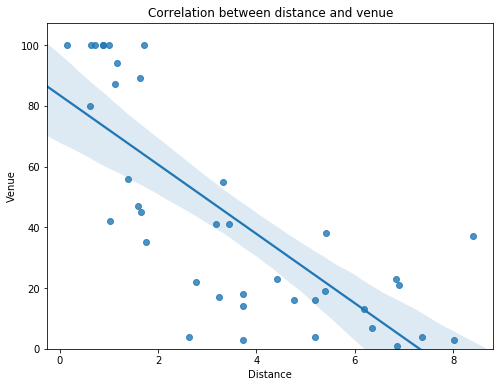

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="Distance", y="Venue", data=ddn)
plt.ylim(0,)
plt.title('Correlation between distance and venue')


(0, 165.1504178640332)

<Figure size 576x432 with 0 Axes>

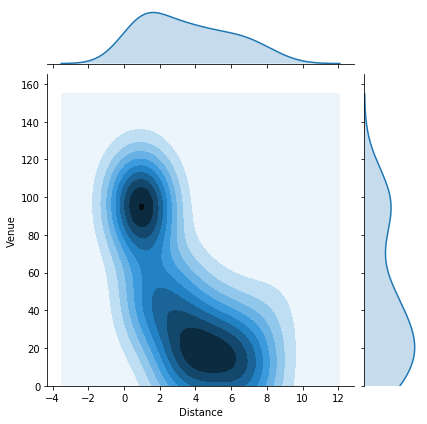

In [121]:
plt.figure(figsize=(width, height))
sns.jointplot(x="Distance", y="Venue", data=ddn, kind='kde')
plt.ylim(0,)


In [41]:
ddn1 = ddn[ddn['Distance'] < 2 ]
ddn2 = ddn[ (ddn['Distance'] >= 4) & (ddn['Distance'] <= 6)]

ddn3 = pd.concat([ddn1,ddn2])

In [43]:
riplac = getNearbyVenues(names=ddn3['Neighborhood'],
                                   latitudes=ddn3['Latitude'],
                                   longitudes=ddn3['Longitude']
                                  )

Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Queen's Park
The Beaches West, India Bazaar
Davisville
Forest Hill North, Forest Hill West
Dovercourt Village, Dufferin
Brockton, Exhibition Place, Parkdale Village
Business Reply Mail Processing Centre 969 Eastern


In [45]:
riplac.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Cabbagetown, St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
1,"Cabbagetown, St. James Town",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
2,"Cabbagetown, St. James Town",43.667967,-79.367675,Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant
3,"Cabbagetown, St. James Town",43.667967,-79.367675,Merryberry Cafe + Bistro,43.666630,-79.368792,Café
4,"Cabbagetown, St. James Town",43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant


In [48]:
# create map of Toronto using latitude and longitude values
map_venue_neigh = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(riplac['Venue Latitude'], riplac['Venue Longitude'], riplac['Neighborhood'], riplac['Venue']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venue_neigh)  
    
map_venue_neigh

In [113]:
riplac_selected = riplac[ (riplac['Venue Category'] == 'Chinese Restaurant') | ( riplac['Venue Category'] == 'Mexican Restaurant' ) | ( riplac['Venue Category'] == 'Donut Shop') | ( riplac['Venue Category'] == 'Ice Cream Shop') ]
#riplac_selected = riplac[ (riplac['Venue Category'] == 'Pharmacy') ]

In [114]:
    # set color scheme for the venue category
    pointer=['Chinese Restaurant','Mexican Restaurant','Donut Shop','Ice Cream Shop']
    rainbow = ['red','blue','green','purple']
    data = {'Name':pointer, 'color':rainbow} 
    colordf = pd.DataFrame(data)
    colordf.set_index('Name',inplace=True)
colordf.loc['Chinese Restaurant','color']

'red'

In [115]:
# create map of Toronto using latitude and longitude values
map_venue_selected = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(riplac_selected['Venue Latitude'], riplac_selected['Venue Longitude'], riplac_selected['Neighborhood'], riplac_selected['Venue Category']):
    label = '{}, {}'.format(neighborhood, borough)
    cval = colordf.loc[neighborhood,'color']
    #cval = 'red'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=cval,
        fill=True,
        fill_color=cval,
        fill_opacity=0.7,
        parse_html=False).add_to(map_venue_selected)  
    
map_venue_selected

In [116]:
riplac_selected['Venue Category'].value_counts()

Chinese Restaurant    14
Ice Cream Shop        12
Mexican Restaurant    11
Donut Shop             2
Name: Venue Category, dtype: int64

In [117]:
riplac_selected['Neighborhood'].value_counts()

Chinatown, Grange Park, Kensington Market            8
Central Bay Street                                   6
Church and Wellesley                                 3
Harbourfront                                         3
Design Exchange, Toronto Dominion Centre             3
Harbourfront East, Toronto Islands, Union Station    3
Ryerson, Garden District                             2
Queen's Park                                         2
Cabbagetown, St. James Town                          2
First Canadian Place, Underground city               1
Harbord, University of Toronto                       1
Adelaide, King, Richmond                             1
Forest Hill North, Forest Hill West                  1
The Beaches West, India Bazaar                       1
St. James Town                                       1
Commerce Court, Victoria Hotel                       1
Name: Neighborhood, dtype: int64